The goal of this notebook is to explore the alfalfa data and the daily weather data from the GAEMN set that Dr. Maier provided. Plots will be made

In [1]:
###imports
import pandas as pd
import statistics
import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#API
from API import *

In [2]:
# get alfalfa data
alfDf = pd.read_csv(r'C:\Users\chris\Documents\Thesis\data\alfalfa\aggregateData\aggregateData.csv')
alfDf = alfDf.drop("Unnamed: 0",axis=1)

# get all GAEMN weather data for Georgia
gaWDf = pd.read_csv(r"C:\Users\chris\Documents\Thesis\data\weather\processedData\Georgia\Daily\allData.csv")
gaWDf = gaWDf.drop("Unnamed: 0",axis=1)
gaWDf = gaWDf.drop("Unnamed: 1",axis=1)

pd.set_option('display.max_rows', 2000)

In [3]:
alfDf

,State,City,Date Sown,Variety,Date of Cut,Date of Cut (Epoch),Yield (tons/acre),Time Since Sown (Days),Time Since Last Harvest (Days)
0,Georgia,Athens,2007-10-10,TS 4010,2008-05-06,1.210046e+09,2.02,209,209
1,Georgia,Athens,2007-10-10,TS 4010,2008-06-20,1.213934e+09,0.47,254,45
2,Georgia,Athens,2007-10-10,TS 4010,2008-08-28,1.219896e+09,0.10,323,69
3,Georgia,Athens,2007-10-10,TS 4010,2008-12-05,1.228453e+09,0.76,422,99
4,Georgia,Athens,2007-10-10,BaraWet 501,2008-05-06,1.210046e+09,1.66,209,209
5,Georgia,Athens,2007-10-10,BaraWet 501,2008-06-20,1.213934e+09,0.56,254,45
6,Georgia,Athens,2007-10-10,BaraWet 501,2008-08-28,1.219896e+09,0.12,323,69
7,Georgia,Athens,2007-10-10,BaraWet 501,2008-12-05,1.228453e+09,0.79,422,99
8,Georgia,Athens,2007-10-10,GA-505,2008-05-06,1.210046e+09,1.68,209,209
9,Georgia,Athens,2007-10-10,GA-505,2008-06-20,1.213934e+09,0.51,254,45


In [4]:
gaWDf

,State,City,Date,Max Air Temp (C),Min Air Temp (C),Avg Air Temp (C),Total Solar Radiation (MJ/m^2),Total Rainfall (mm)
0,Georgia,Midville,2008-01-01,11.84,3.58,7.70,13.54,0.000
1,Georgia,Midville,2008-01-02,3.65,-3.15,-0.05,14.95,0.000
2,Georgia,Midville,2008-01-03,5.22,-6.95,-2.00,14.43,0.000
3,Georgia,Midville,2008-01-04,9.44,-7.72,-0.51,14.07,0.000
4,Georgia,Midville,2008-01-05,15.46,-3.26,5.21,9.89,0.000
5,Georgia,Midville,2008-01-06,22.06,4.17,11.97,11.34,0.000
6,Georgia,Midville,2008-01-07,22.46,5.57,12.53,10.46,0.000
7,Georgia,Midville,2008-01-08,22.99,10.57,16.44,8.19,0.254
8,Georgia,Midville,2008-01-09,22.02,14.65,17.37,5.30,0.000
9,Georgia,Midville,2008-01-10,22.68,14.49,17.58,7.94,0.000


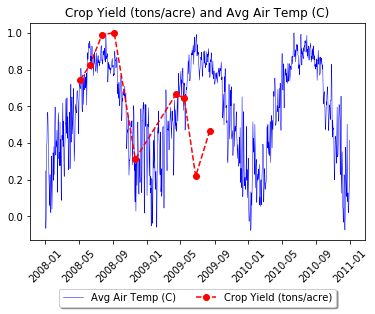

In [5]:
### lets make a plot having both the crop yield and the weather data on the same plot
import matplotlib.pyplot as plt

## global variables
#sownDate = "2007-10-10"
#city = "Athens"
sownDate = "2007-11-01"
city = "Midville"
athensReplacement = "Watuga"
#weather= "Total Solar Radiation (MJ/m^2)"
#weather= "Total Rainfall (mm)"
weather= "Avg Air Temp (C)"


## make sub dataframes
#alfalfa
cityAlfDf = alfDf.loc[(alfDf["City"] == city) & (alfDf["Date Sown"] == sownDate)]

#weather
# check to see if city="Athens" (there is not GAEMN data for athens, but there is for Watkinsville)
if city=="Athens":
    cityWDf = gaWDf.loc[(gaWDf["City"] == athensReplacement)]
else:
    cityWDf = gaWDf.loc[(gaWDf["City"] == city)]

    
## make lists of alfalfa data- make list of datetimes and list of crop yields

# lets make a dictionary holding the values to be plotted. It will
# be of the form: {date_of_Cut: avgYield of all varieties}

plotDict = {}
for index, row in cityAlfDf.iterrows():
    doc = cityAlfDf.loc[index, "Date of Cut"]
    if doc not in plotDict:
        plotDict[doc] = [0.0, 0] #this list is of the form [sumOfYield, numberOfVarietiesInSum]
    aYield = cityAlfDf.loc[index, "Yield (tons/acre)"]
    plotDict[doc][0] += aYield
    plotDict[doc][1] += 1 

## make lists that will be used to make the plot
xListAlf = []
yListAlf = []
for key in plotDict:
    # get x-value
    datetimeObj = datetime.datetime.strptime(key, '%Y-%m-%d')
    xListAlf.append(datetimeObj)
    
    # get y-value
    aSum = plotDict[key][0]
    n = plotDict[key][1]
    avg = (aSum/n)*1.0
    yListAlf.append(avg)
    
    # normalize all the values in yListAlf
    maxValue = max(yListAlf)
    yListAlf = [float(i)/maxValue for i in yListAlf]

# make lists of weather data- make list of datetimes and weather info
xListW = []
yListW = []
for index, row in cityWDf.iterrows():
    #get x-value
    datePoint = cityWDf.loc[index, "Date"]
    datePoint = datetime.datetime.strptime(datePoint, '%Y-%m-%d')
    #get y-value
    weatherPoint = cityWDf.loc[index, weather]
    
    #fill lists
    xListW.append(datePoint)
    yListW.append(weatherPoint)
    
# normalize all the values in yListW
maxValue = max(yListW)
yListW = [float(i)/maxValue for i in yListW]

## make the plot
#datesAlf = matplotlib.dates.date2num(xListAlf)
#matplotlib.pyplot.plot_date(datesAlf, yListAlf)

#plt.gcf().autofmt_xdate()
plt.plot(xListW, yListW, color="b", label=weather, linewidth=0.5)
plt.plot(xListAlf, yListAlf, color='r', label="Crop Yield (tons/acre)", linestyle='--', marker='o')

# plot settings
title = "Crop Yield (tons/acre) and " + weather
plt.title(title)
# make a legend and place it below the picture
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=2)
plt.xticks(rotation=45)

plt.show()

In [6]:
# lets make a function from the work in the above cell. This function will make a plot that will plot both the alfalfa and 
# the weather data.

def plotAlfAndWeather(alfDf, wDf, city, sownDate, weather, athensReplacement="Watuga", show=True):
    """
    inputs- alfDf - dataframe - dataframe storing alfalfa yield data. Must have columns labeled
                                "City", "Date Sown", "Date of Cut", and "Yield (tons/acre)"
          - wDf - dataframe - dataframe storing weather data. Must have colums labeled\
                              "City", "Date", and weather(this is the input variable)
          - city - string - string name of the city whose data will be plotted. The city must be in 
                            the "City" columns of alfDf and wDf
          -sownDate - string of the form year-month-day (XXXX-XX-XX) - the sown date of the data to be 
                      plotted. This must be in the "Date Sown" col of alfDf
          -weather - string - represents some type of data. Must be the same as a col name of wDf
          -athensReplacement - string - the GAEMN data does not have athens weather data, but it does
                                        have Watkinsville data. So this input must have a value in the
                                        col "City" of wDf. This data will be used as the athens data.
          -show - boolean - If 'True', then the final plot will be shown. Else, no plots will be shown.
    output- returns the final plot while also showing that plot if show=True.
    
    NOTE: The average yield of all alfalfa varieties at each cut is being graphed.
    """
    #imports
    import matplotlib.pyplot as plt
    
    ## make sub dataframes
    #alfalfa
    cityAlfDf = alfDf.loc[(alfDf["City"] == city) & (alfDf["Date Sown"] == sownDate)]
    
    #weather
    # check to see if city="Athens" (there is not GAEMN data for athens, but there is for Watkinsville)
    if city=="Athens":
        cityWDf = wDf.loc[(wDf["City"] == athensReplacement)]
    else:
        cityWDf = wDf.loc[(wDf["City"] == city)]

    ## make lists of alfalfa data- make list of dates and list of crop yields

    # lets make a dictionary holding the values to be plotted. It will
    # be of the form: {date_of_Cut: avgYield of all varieties}. This will
    # be used to store the average yield of all alfalfa varieties.

    plotDict = {}
    for index, row in cityAlfDf.iterrows():
        doc = cityAlfDf.loc[index, "Date of Cut"]
        if doc not in plotDict:
            plotDict[doc] = [0.0, 0] #this list is of the form [sumOfYield, numberOfVarietiesInSum]
        aYield = cityAlfDf.loc[index, "Yield (tons/acre)"]
        plotDict[doc][0] += aYield
        plotDict[doc][1] += 1 

    ## make lists that will be used to make the plot
    xListAlf = []
    yListAlf = []
    for key in plotDict:
        # get x-value
        datetimeObj = datetime.datetime.strptime(key, '%Y-%m-%d')
        xListAlf.append(datetimeObj)

        # get y-value
        aSum = plotDict[key][0]
        n = plotDict[key][1]
        avg = (aSum/n)*1.0
        yListAlf.append(avg)

        # normalize all the values in yListAlf
        maxValue = max(yListAlf)
        yListAlf = [float(i)/maxValue for i in yListAlf]

    # make lists of weather data- make list of dates and weather info
    xListW = []
    yListW = []
    for index, row in cityWDf.iterrows():
        #get x-value
        datePoint = cityWDf.loc[index, "Date"]
        datePoint = datetime.datetime.strptime(datePoint, '%Y-%m-%d')
        #get y-value
        weatherPoint = cityWDf.loc[index, weather]

        #fill lists
        xListW.append(datePoint)
        yListW.append(weatherPoint)

    # normalize all the values in yListW
    maxValue = max(yListW)
    yListW = [float(i)/maxValue for i in yListW]

    ## make the plot
    fig = plt.figure()
    plt.plot(xListW, yListW, color="b", label=weather, linewidth=0.5)
    plt.plot(xListAlf, yListAlf, color='r', label="Crop Yield (tons/acre)", linestyle='--', marker='o')

    ## plot settings
    # make title
    index = weather.find('(')
    weatherString = weather[:index]
    title = "Yield and " + weatherString + " for " + city + ", sown at " + str(sownDate)
    plt.title(title)
    # make a legend and place it below the picture
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=2)
    plt.xticks(rotation=45)
    
    # show plot
    if show:
        plt.show()
    return fig

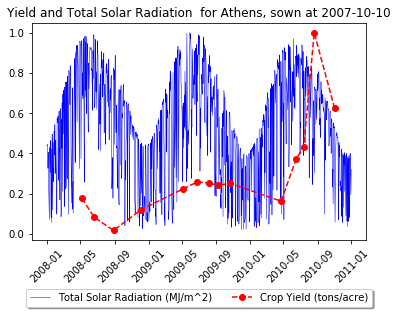

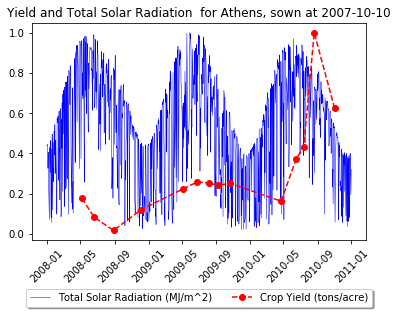

In [7]:
# test for 'plotAlfAndWeather'
sownDate = "2007-10-10"
city = "Athens"
#sownDate = "2007-11-01"
#city = "Midville"
athensReplacement = "Watuga"
#weather= "Total Solar Radiation (MJ/m^2)"
#weather= "Total Rainfall (mm)"
weather= "Total Solar Radiation (MJ/m^2)"

plotAlfAndWeather(alfDf, gaWDf, city, sownDate, weather, athensReplacement="Watuga")

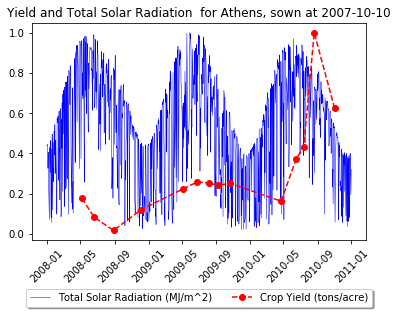

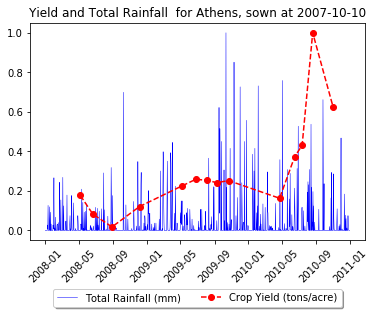

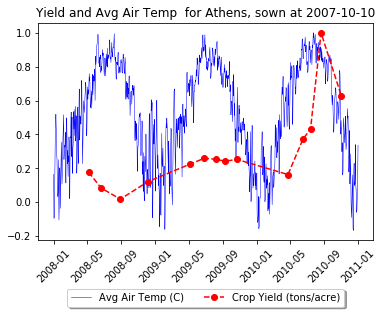

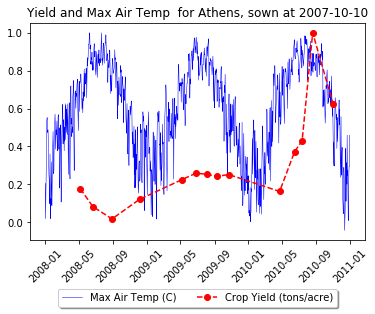

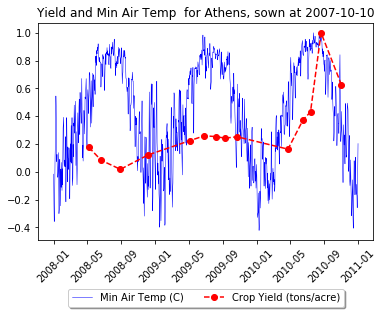

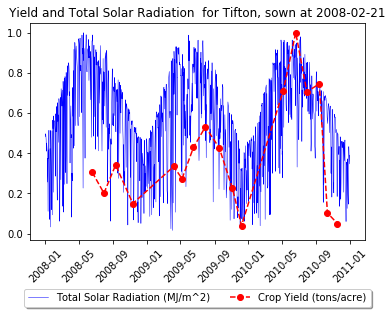

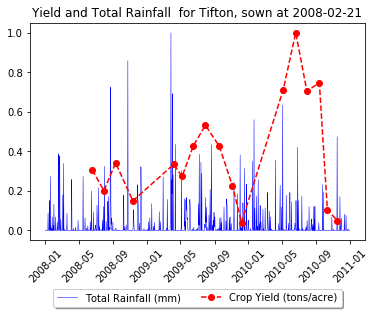

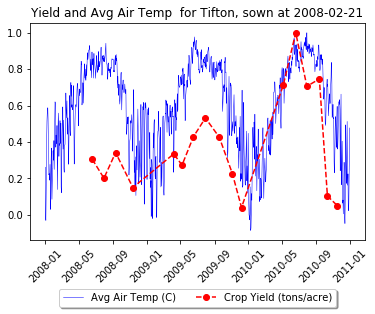

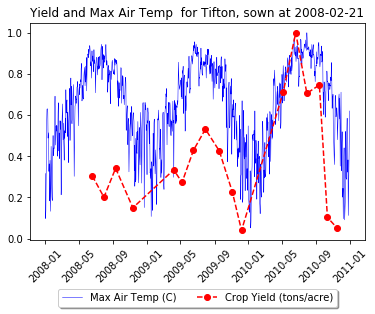

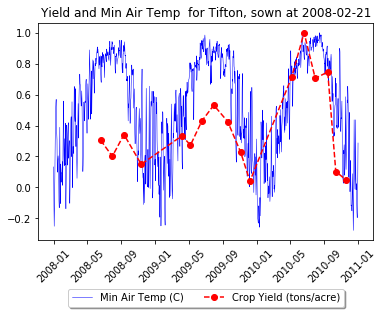

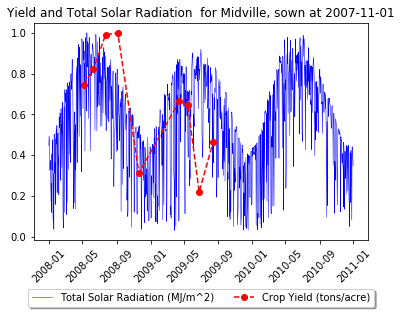

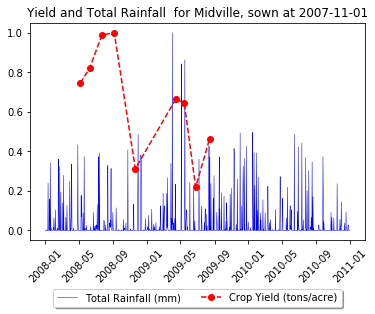

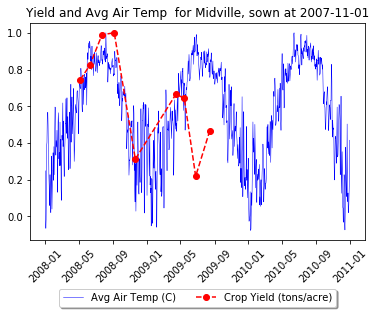

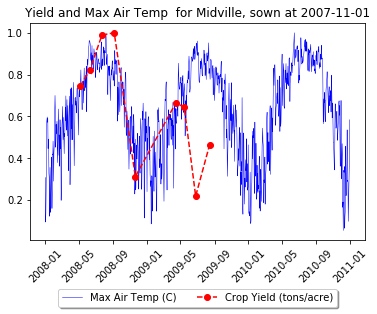

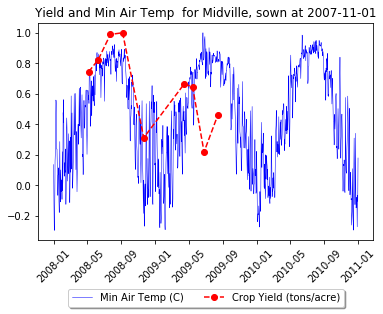

In [8]:
# lets make plots for all locations and all weather variables

# global params
showVal = True

# import pdf stuff
from matplotlib.backends.backend_pdf import PdfPages

# make lists of inputs to make plots
citySownList = [("Athens", "2007-10-10"), ("Tifton", "2008-02-21"), ("Midville", "2007-11-01")]
weatherList = ["Total Solar Radiation (MJ/m^2)", "Total Rainfall (mm)", "Avg Air Temp (C)", 
               "Max Air Temp (C)", "Min Air Temp (C)"]

# make plots and save them
pdf = matplotlib.backends.backend_pdf.PdfPages(r"C:\Users\chris\Documents\Thesis\data\aggregate\visualizations\graphsGA.pdf")
for city, sownDate in citySownList:
    for weather in weatherList:
        fig = plotAlfAndWeather(alfDf, gaWDf, city, sownDate, weather, show=showVal)
        pdf.savefig(fig)
pdf.close()

In [9]:
# lets make a function that will store the pdf given certain cities, sownDates, and weather queries

def makeAlfWeatherPDF(saveLocation, citySownList, weatherList, alfDf, wDf, athensReplacement="Watuga", show=True):
    """
    inputs- saveLocation - raw string - directory location where the pdf will be saved.
          - citySownList - list of tuples of the form (String1, String2) - where String1 is a city
                           in the "City" col of alfDf and wDf and String 2 is the sown date 
                           (year-month-day XXXX-XX-XX) in the "Date Sown" col of alfDf.
          - weatherList - list of strings - where each string is a col name in wDf
          - alfDf - dataframe - dataframe storing alfalfa yield data. Must have columns labeled
                                "City", "Date Sown", "Date of Cut", and "Yield (tons/acre)"
          - wDf - dataframe - dataframe storing weather data. Must have colums labeled
                              "City", "Date", and weather(this is the input variable)
          -athensReplacement - string - the GAEMN data does not have athens weather data, but it does
                                        have Watkinsville data. So this input must have a value in the
                                        col "City" of wDf. This data will be used as the athens data.
          -show - boolean - If 'True', then the final plot will be shown. Else, no plots will be shown.
    outputs- no output, but will save
    """
    # import pdf stuff
    from matplotlib.backends.backend_pdf import PdfPages

    # make plots and save them
    pdf = matplotlib.backends.backend_pdf.PdfPages(saveLocation)
    for city, sownDate in citySownList:
        for weather in weatherList:
            fig = plotAlfAndWeather(alfDf, wDf, city, sownDate, weather, athensReplacement, show)
            pdf.savefig(fig)
    pdf.close()

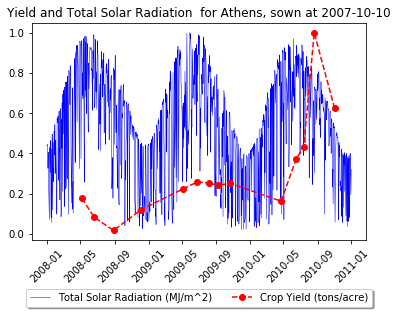

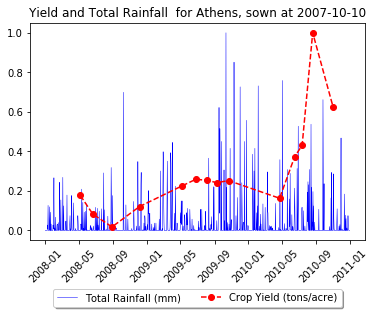

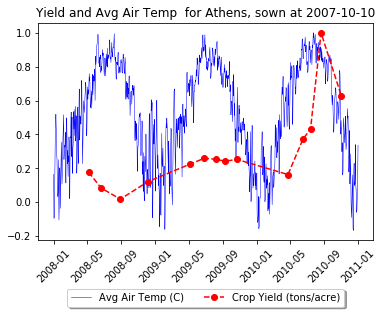

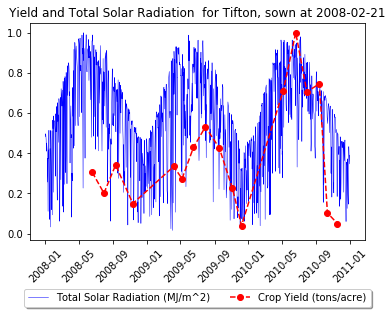

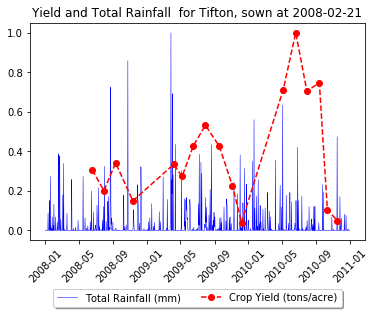

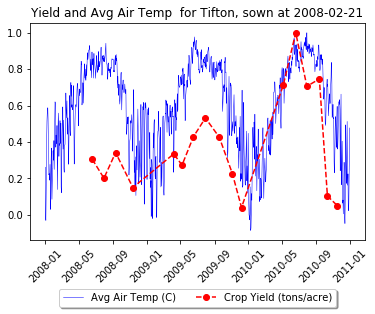

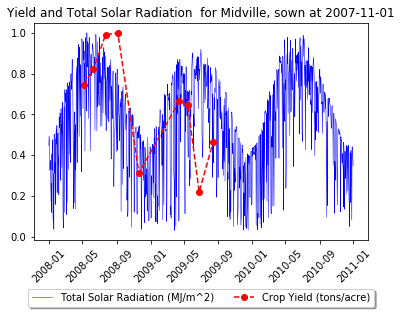

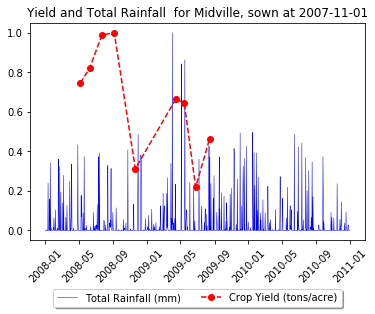

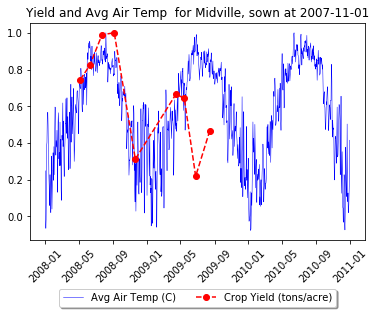

In [10]:
# test for makeAlfWeatherPDF

citySownList = [("Athens", "2007-10-10"), ("Tifton", "2008-02-21"), ("Midville", "2007-11-01")]
weatherList = ["Total Solar Radiation (MJ/m^2)", "Total Rainfall (mm)", "Avg Air Temp (C)"]

makeAlfWeatherPDF("graphTest.pdf", citySownList, weatherList, alfDf, gaWDf, athensReplacement="Watuga", show=True)